In [92]:
import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import string
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [93]:
spam=pd.read_csv('spam.csv', encoding="latin-1")
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [94]:
spam.info()
spam.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [95]:
spam=spam.rename(columns={'v1':'Type','v2':'Messages'})
spam.columns

Index(['Type', 'Messages', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [96]:
spam.isnull().sum()


Type             0
Messages         0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [97]:
spam["Length"]=spam["Messages"].apply(len)

In [98]:
spam.head()

,Type,Messages,Unnamed: 2,Unnamed: 3,Unnamed: 4,Length
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


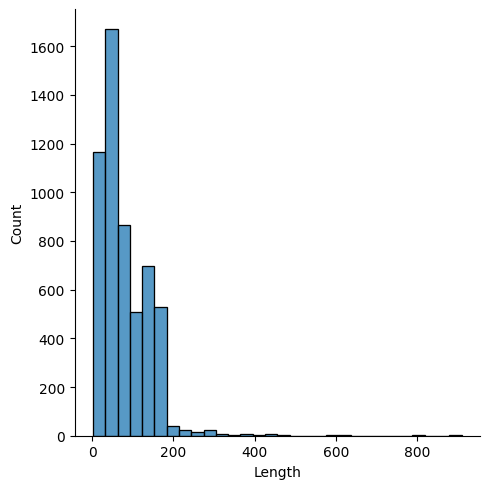

In [99]:
sns.displot(spam["Length"], bins=30)

In [100]:
spam["Length"].max()

910

In [101]:
spam[spam["Length"]==910]["Messages"].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [102]:
spam.head()

,Type,Messages,Unnamed: 2,Unnamed: 3,Unnamed: 4,Length
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Type', ylabel='Length'>

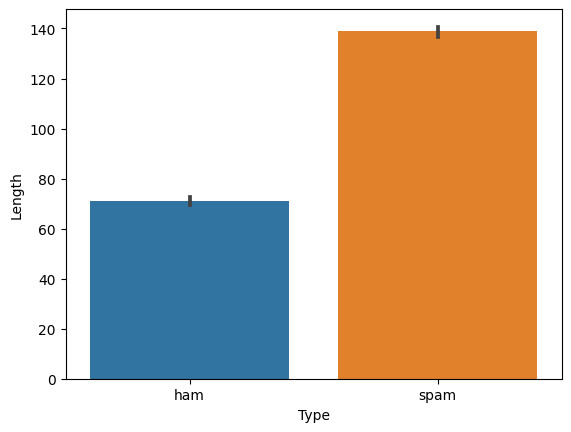

In [103]:
sns.barplot(x='Type', y='Length', data=spam)

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

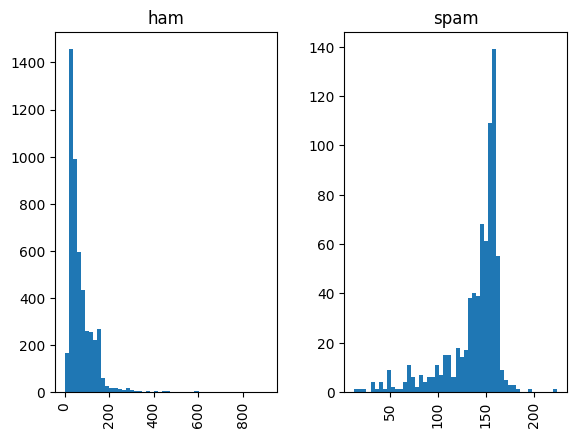

In [104]:
spam.hist(column='Length',by='Type', bins=50)

In [105]:
spam.loc[spam['Type']=='spam', 'Type',] = 0
spam.loc[spam['Type']=='ham', 'Type',] = 1


In [106]:
x=spam['Messages']
y=spam['Type']

In [107]:
print(x)
print(y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Messages, Length: 5572, dtype: object
0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Type, Length: 5572, dtype: object


In [108]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=3)

In [109]:
print(x.shape)
print(x_test.shape)
print(x_train.shape)

(5572,)
(1115,)
(4457,)


In [115]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [120]:
feature_extraction = TfidfVectorizer(min_df=1,stop_words='english')

x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)

In [121]:
print(x_train_features)

  (0, 741)	0.3219352588930141
  (0, 3979)	0.2410582143632299
  (0, 4296)	0.3891385935794867
  (0, 6599)	0.20296878731699391
  (0, 3386)	0.3219352588930141
  (0, 2122)	0.38613577623520473
  (0, 3136)	0.440116181574609
  (0, 3262)	0.25877035357606315
  (0, 3380)	0.21807195185332803
  (0, 4513)	0.2909649098524696
  (1, 4061)	0.380431198316959
  (1, 6872)	0.4306015894277422
  (1, 6417)	0.4769136859540388
  (1, 6442)	0.5652509076654626
  (1, 7443)	0.35056971070320353
  (2, 933)	0.4917598465723273
  (2, 2109)	0.42972812260098503
  (2, 3917)	0.40088501350982736
  (2, 2226)	0.413484525934624
  (2, 5825)	0.4917598465723273
  (3, 6140)	0.4903863168693604
  (3, 1599)	0.5927091854194291
  (3, 1842)	0.3708680641487708
  (3, 7453)	0.5202633571003087
  (4, 2531)	0.7419319091456392
  :	:
  (4452, 2122)	0.31002103760284144
  (4453, 999)	0.6760129013031282
  (4453, 7273)	0.5787739591782677
  (4453, 1762)	0.45610005640082985
  (4454, 3029)	0.42618909997886
  (4454, 2086)	0.3809693742808703
  (4454, 3088)

In [122]:
print(x_test_features)

  (0, 6007)	0.537093591660729
  (0, 4294)	0.5159375448718375
  (0, 1537)	0.667337188824809
  (1, 7222)	0.23059492898537967
  (1, 6599)	0.14954692788663673
  (1, 6579)	0.2733682162643466
  (1, 5501)	0.28671640581392144
  (1, 5347)	0.2733682162643466
  (1, 5250)	0.28671640581392144
  (1, 4045)	0.250549335510249
  (1, 3365)	0.28671640581392144
  (1, 3300)	0.37297727661877506
  (1, 2899)	0.1385795841356552
  (1, 602)	0.28671640581392144
  (1, 520)	0.19344507865262492
  (1, 321)	0.28671640581392144
  (1, 43)	0.24547458936715758
  (1, 1)	0.21260233518669946
  (2, 6701)	0.30969080396105314
  (2, 6648)	0.3410121739015846
  (2, 4070)	0.44361668503137164
  (2, 2941)	0.6068486133983123
  (2, 2939)	0.47195476517479323
  (3, 7101)	0.29334330258175106
  (3, 6746)	0.2031810874151213
  :	:
  (1111, 7415)	0.4945753828645536
  (1111, 6848)	0.39685462025643714
  (1111, 6093)	0.4671914311419049
  (1111, 3259)	0.4477622081928626
  (1111, 2458)	0.42325261089251354
  (1112, 4903)	0.4770390302498559
  (1112, 

In [123]:
model = LogisticRegression()

In [124]:
# training the logistic regression model with the training data
model.fit(x_train_features,y_train)

LogisticRegression()

In [125]:
prediction_on_training_data = model.predict(x_train_features)
accuracy_on_training_data = accuracy_score(y_train,prediction_on_training_data)

In [127]:
print('accuracy on training data:',accuracy_on_training_data)

accuracy on training data: 0.9661207089970832


In [128]:
prediction_on_test_data = model.predict(x_test_features)
accuracy_on_test_data = accuracy_score(y_test,prediction_on_test_data)

In [129]:
print('accuracy on test data:',accuracy_on_test_data)

accuracy on test data: 0.9623318385650225


In [130]:
input_sms = ['Nah i do not think he goes to usf, he lives around here though']	


# convert text to feature vectors
input_data_features = feature_extraction.transform(input_sms)

# making predictions

prediction = model.predict(input_data_features)
print(prediction)

if prediction[0]==1:
  print('ham sms')
else:
  print('spam sms')

[1]
ham sms
